In [6]:
Principal Component Analysis is one of the most used unsupervised learning algorithm, 
it is a dimensionality reduction algorithm, it is mainly used for data visualization, 
basically, when we have high dimensionality data as 4 to 5 to visualize it to understand better.


iris data set should load to data frame which is 4 dimentional with 4 fetures 
'sepal length','sepal width','petal length','petal width'

PCA will reduce 4 dimentional into 2 dimentional such that to plot and understand data and target. which is to predict

PCA is to stanadardize data. code is separating out features because we standardize the features and not the target.


Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.


In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load data set 
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [16]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

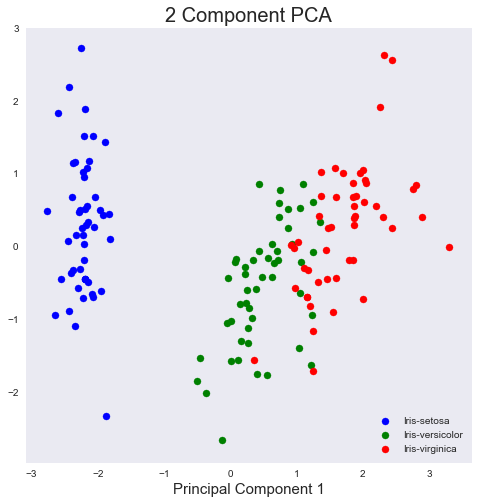

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color, s = 50)
ax.legend(targets)
ax.grid()
plt.show()